In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [27]:
df = pd.read_csv("data/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
df.shape

(1599, 12)

In [29]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
df.duplicated().sum()

240

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


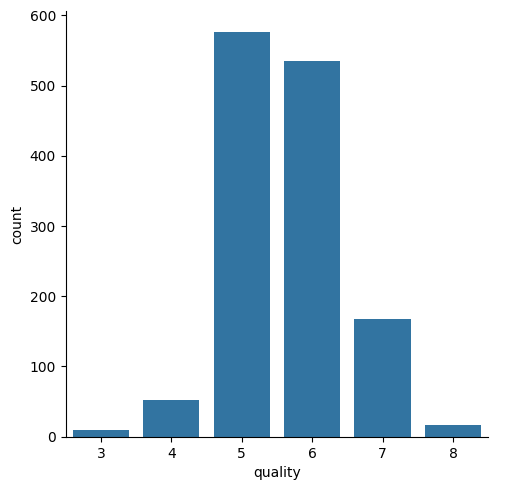

In [33]:
sns.catplot(x="quality",data=df,kind="count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

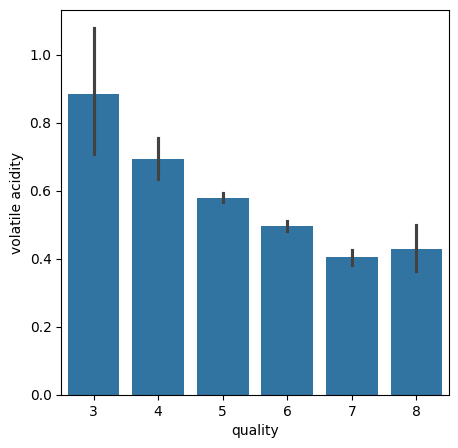

In [34]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

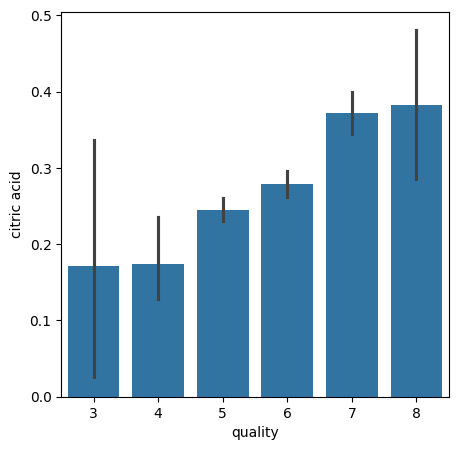

In [35]:
# Citric acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="citric acid",data=df)

<Axes: >

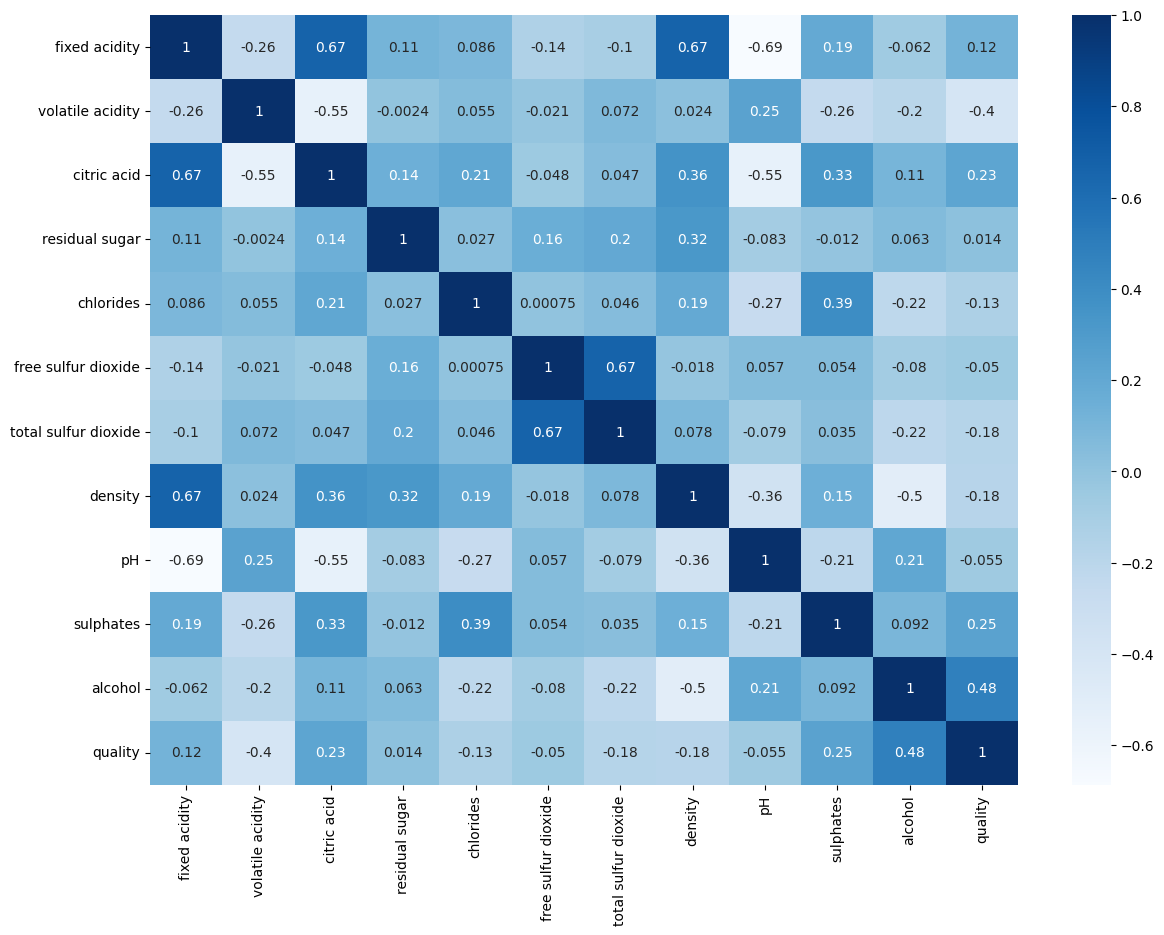

In [36]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [37]:
X = df.drop(columns=["quality"],axis=1)

In [38]:
Y = df["quality"].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int64


In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [40]:
model = RandomForestClassifier(n_estimators=10,criterion="entropy")

In [41]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [42]:
y_pred = model.predict(x_test)

0.8860294117647058
0.6363636363636364
0.3783783783783784


<Axes: >

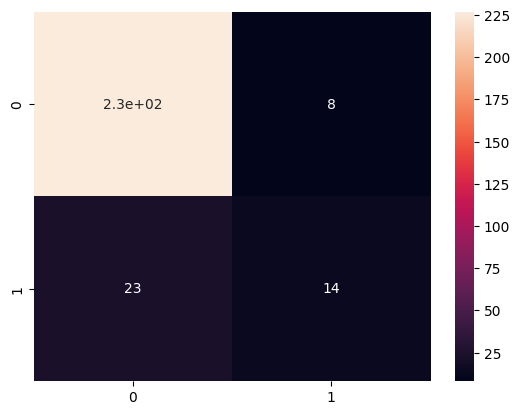

In [44]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [56]:
inp_data =np.array([7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2])
inp_data=inp_data.reshape(1,-1)

In [57]:
ans = model.predict(inp_data)
if ans[0]:
    print("Good")
else:
    print("Bad")

Bad


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
